Sklearn modeling flow

1. Import the model: from sklearn import model
2. Instantiate the model: model = model()
3. Train the model: model.fit(X, y)
4. Evaluate the model: model.score(new_X, new_y)
5. Make predictions: model.predict(new_X)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve

In [4]:
file = "../data/fundamentals/ML_Houses_dataset.csv"
data = pd.read_csv(file)
# data.head()
data = data.sample(frac=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1424,1425,20,RL,NaN,9503,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,144000
933,934,20,RL,63.0,8487,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,190000
1503,863,20,RL,81.0,9672,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2010,WD,Normal,152000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
613,614,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,147000


In [5]:
livecode_data = data[["GrLivArea", "SalePrice"]]
livecode_data.head()

,GrLivArea,SalePrice
1424,1344,144000
933,1500,190000
1503,1097,152000
1066,1571,178000
613,1120,147000


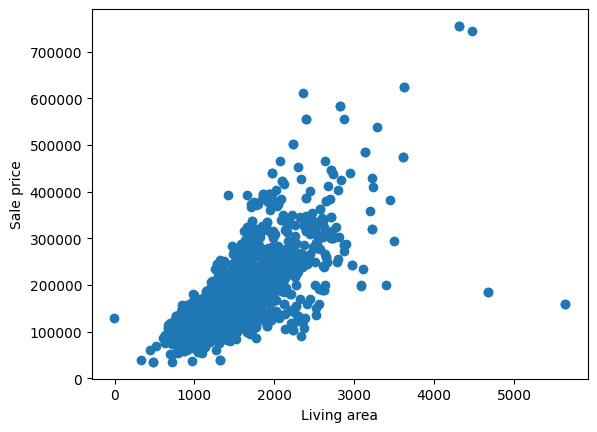

In [6]:
# Plot Living area vs Sale price
plt.scatter(data['GrLivArea'], data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()

In [7]:
model = LinearRegression()

X = data[['GrLivArea']]
y = data[['SalePrice']]

model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
model.coef_

array([[105.00927564]])

In [9]:
model.intercept_

array([22104.12101002])

In [10]:
model.score(X, y)

0.48960426399689105

In [11]:
# Predict on new data
new_data = pd.DataFrame({'GrLivArea': [1000]})

model.predict(new_data)

array([[127113.39664561]])

Generalization

In [12]:
train_data, test_data = train_test_split(livecode_data, test_size=0.3)

X_train = train_data[['GrLivArea']]
y_train = train_data[['SalePrice']]

X_test = test_data[['GrLivArea']]
y_test = test_data[['SalePrice']]

In [13]:
# Ready X and y
X = livecode_data[['GrLivArea']]
y = livecode_data['SalePrice']
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5217087847264572

Cross Validate

In [15]:
model = LinearRegression()

cv_results = cross_validate(model, X, y, cv=5)

print(cv_results['test_score'])

cv_results['test_score'].mean()

[0.48684154 0.51632903 0.51483875 0.50398312 0.36247536]


np.float64(0.47689355856647797)

Learning Curves

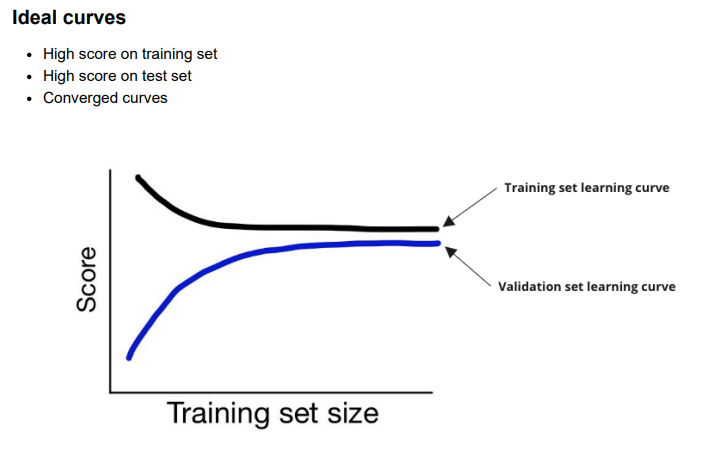

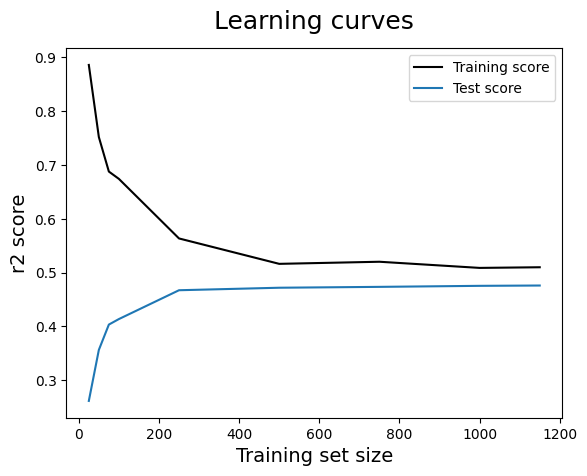

In [16]:
train_sizes = [25,50,75,100,250,500,750,1000,1150]

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score', color='black')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()
plt.show()